# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [5]:
def apply_svd_custom(X_train, X_test, n_components):
    # Perform SVD decomposition on the training data
    U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

    # Select the top `n_components` from Vt
    Vt = Vt[:n_components, :]

    # Project both training and test data onto the reduced subspace
    X_train_reduced = np.dot(X_train, Vt.T)
    X_test_reduced = np.dot(X_test, Vt.T)

    return X_train_reduced, X_test_reduced, Vt

## Part 3: Train Logistic Regression and Measure Performance

In [6]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
svd_components = [150, 200, 250, 300]
# Store the results
results = []
top_singular_vectors = None

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, Vt = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))

    top_singular_vectors = Vt
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 150 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 91.0680 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 159.7789 seconds
Applying custom SVD with 250 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 250, Accuracy: 0.9211, Training time: 203.3557 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 250.0145 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


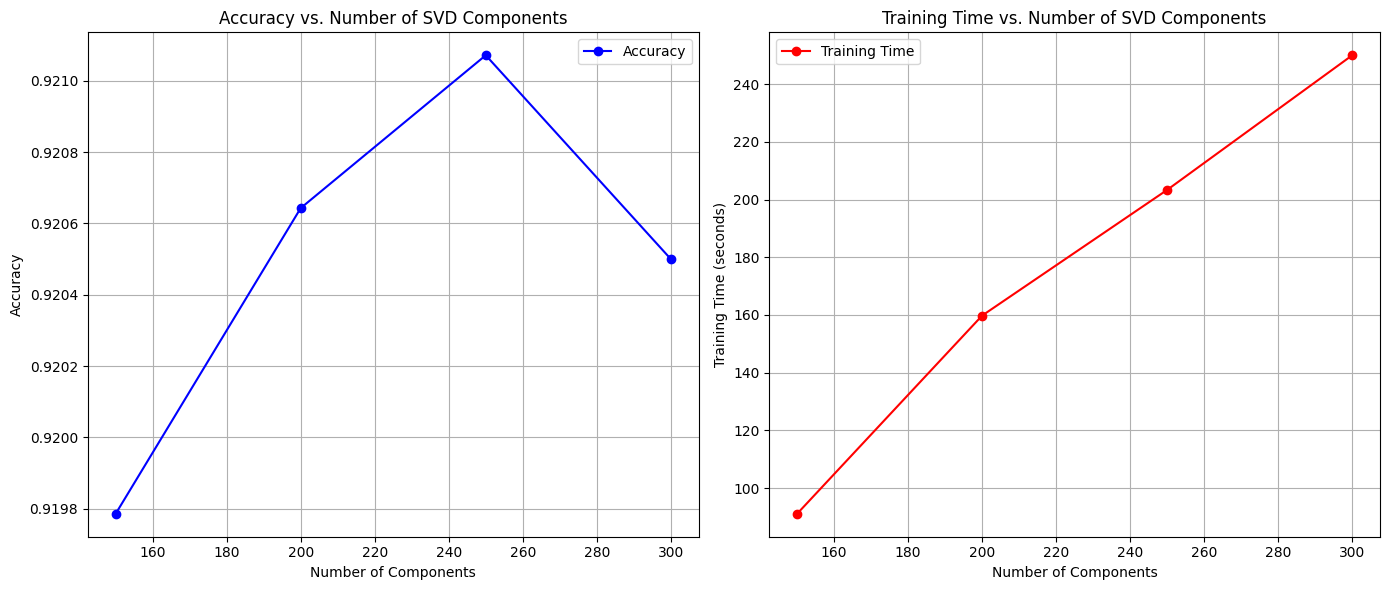

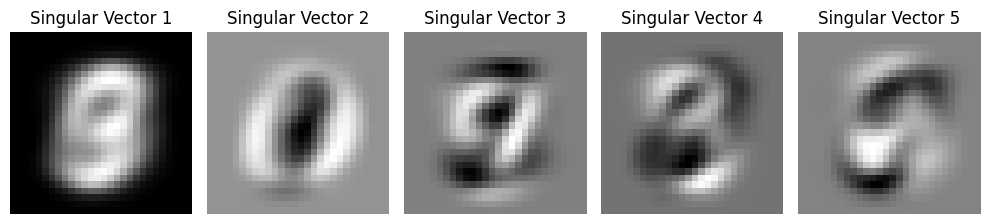

In [9]:
import matplotlib.pyplot as plt

# Store the results for plotting
components = [result[0] for result in results]  # Number of components
accuracies = [result[1] for result in results]  # Accuracies
times = [result[2] for result in results]       # Training times

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o', color='r', label='Training Time')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize top 5 singular vectors
def visualize_singular_vectors(Vt, top_n=5):
    plt.figure(figsize=(10, 5))
    for i in range(top_n):
        plt.subplot(1, top_n, i + 1)
        singular_vector = Vt[i].reshape(28, 28)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f'Singular Vector {i + 1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the top 5 singular vectors
if top_singular_vectors is not None:
    visualize_singular_vectors(top_singular_vectors)
else:
    print("Vt not found. Ensure SVD was applied correctly.")


## Part 6: Analyze / Conclusion

YOUR ANSWER:

- The highest accuracy occurs with 250 components, but there's a slight drop at 300 components. This suggests that after a certain point, adding more components doesn't necessarily help the model generalize better.
- There is also a clear trend where increasing the number of components leads to an increase in training time, which is expected as the model has to handle more data in higher dimensions.
- The best number of SVD components in this case appears to be 250. It provides the highest accuracy with a reasonable trade-off in terms of training time. Going beyond 250 components increases accuracy compared to 250 components.